<a href="https://colab.research.google.com/github/VaibhavLohitashv/Comparing-ML-models-for-Alzheimers-Detection/blob/main/SDP_project_B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Check Specification of runtime

In [1]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.210
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4400.42
clflush size	: 64
cache_alignment	: 64
ad

In [2]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   39G   70G  36% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  775M  61% /usr/sbin/docker-init
/dev/sda1        73G   40G   34G  55% /kaggle/input
tmpfs           6.4G   64K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


# Importing required Libraries like:
-  pandas
-  numpy
-  matplotlib
-  seaborn
-  sklearn

In [3]:
# Data Handling & Visualization Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb  # using alias for seaborn

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

# Warnings Handling
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

# Resampling Technique
from imblearn.over_sampling import SMOTE

# Model Selection and Preprocessing Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline

# Linear and Probabilistic Models
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import BayesianRidge

# Tree-Based & Ensemble Models
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

# Neighbors
from sklearn.neighbors import KNeighborsClassifier

#  Neural Network Model
# from sklearn.neural_network import MLPClassifier

# External ML Library
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)

# Hyperparameter Search
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.exceptions import FitFailedWarning


print("all required libraries are imported successfully.")


all required libraries are imported successfully.


# Getting data set from already downloaded .csv file.
### Source: https://www.kaggle.com/datasets/ankushpanday1/alzheimers-prediction-dataset-global

In [4]:
df_main = pd.read_csv('/content/alzheimers_prediction_dataset.csv')

# Information of Data

In [5]:
df_main.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23089 entries, 0 to 23088
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               23089 non-null  object 
 1   Age                                   23089 non-null  int64  
 2   Gender                                23089 non-null  object 
 3   Education Level                       23089 non-null  int64  
 4   BMI                                   23089 non-null  float64
 5   Physical Activity Level               23089 non-null  object 
 6   Smoking Status                        23089 non-null  object 
 7   Alcohol Consumption                   23089 non-null  object 
 8   Diabetes                              23089 non-null  object 
 9   Hypertension                          23089 non-null  object 
 10  Cholesterol Level                     23089 non-null  object 
 11  Family History 

In [7]:
# Log shape before any processing
print(f"Dataset Shape: {df_main.shape}")

# --- Check for Missing Values ---
print("\nPercentage of Missing Values per Column:")
missing_ratio = df_main.isnull().mean() * 100
print(missing_ratio.round(2))

# --- Check for Duplicates ---
print("\nPercentage of Duplicate Rows:")
duplicate_ratio = df_main.duplicated().mean() * 100
print(f"{duplicate_ratio:.2f}%")

# Optional Debug Logging
if duplicate_ratio > 0:
    print("Warning: Dataset contains duplicate entries.")
else:
    print("No duplicate rows found.")


Dataset Shape: (23089, 25)

Percentage of Missing Values per Column:
Country                                 0.0
Age                                     0.0
Gender                                  0.0
Education Level                         0.0
BMI                                     0.0
Physical Activity Level                 0.0
Smoking Status                          0.0
Alcohol Consumption                     0.0
Diabetes                                0.0
Hypertension                            0.0
Cholesterol Level                       0.0
Family History of Alzheimer’s           0.0
Cognitive Test Score                    0.0
Depression Level                        0.0
Sleep Quality                           0.0
Dietary Habits                          0.0
Air Pollution Exposure                  0.0
Employment Status                       0.0
Marital Status                          0.0
Genetic Risk Factor (APOE-ε4 allele)    0.0
Social Engagement Level                 0.0
Income 

In [8]:
# Function to identify outliers using IQR method
def detect_outliers(df, feature_name):
    q1 = df[feature_name].quantile(0.25)
    q3 = df[feature_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier_rows = df[(df[feature_name] < lower_bound) | (df[feature_name] > upper_bound)]
    return outlier_rows

# Initialize an empty DataFrame to store all outliers
combined_outliers = pd.DataFrame()

# Loop through all numeric columns to detect and collect outliers
numeric_cols = df_main.select_dtypes(include=["number"]).columns

for feature in numeric_cols:
    col_outliers = detect_outliers(df_main, feature)
    if not col_outliers.empty:
        combined_outliers = pd.concat([combined_outliers, col_outliers], axis=0)

# Drop duplicate indices if any
combined_outliers.reset_index(drop=True, inplace=True)

# Summarize the outlier analysis
num_outliers = combined_outliers.shape[0]
dataset_size = df_main.shape[0]
outlier_percent = (num_outliers / dataset_size) * 100

# Reporting
print("\nOutlier Detection Summary:")
if num_outliers == 0:
    print("No outliers detected in the dataset.")
else:
    print(f"Total Outliers Found: {num_outliers}")
    print(f"Outlier Proportion: {outlier_percent:.2f}% of the dataset")

# Optional: view outliers
# print(combined_outliers.head())



Outlier Detection Summary:
No outliers detected in the dataset.


# Exploratory data analysis: Data Distribution

/tmp/ipython-input-546843305.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Gender', data=df_main, palette='cool')
/tmp/ipython-input-546843305.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df_main, x='Smoking Status', palette='pastel')
/tmp/ipython-input-546843305.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x="Alzheimer’s Diagnosis", data=df_main, palette='Set3')


Visualizations rendered successfully.


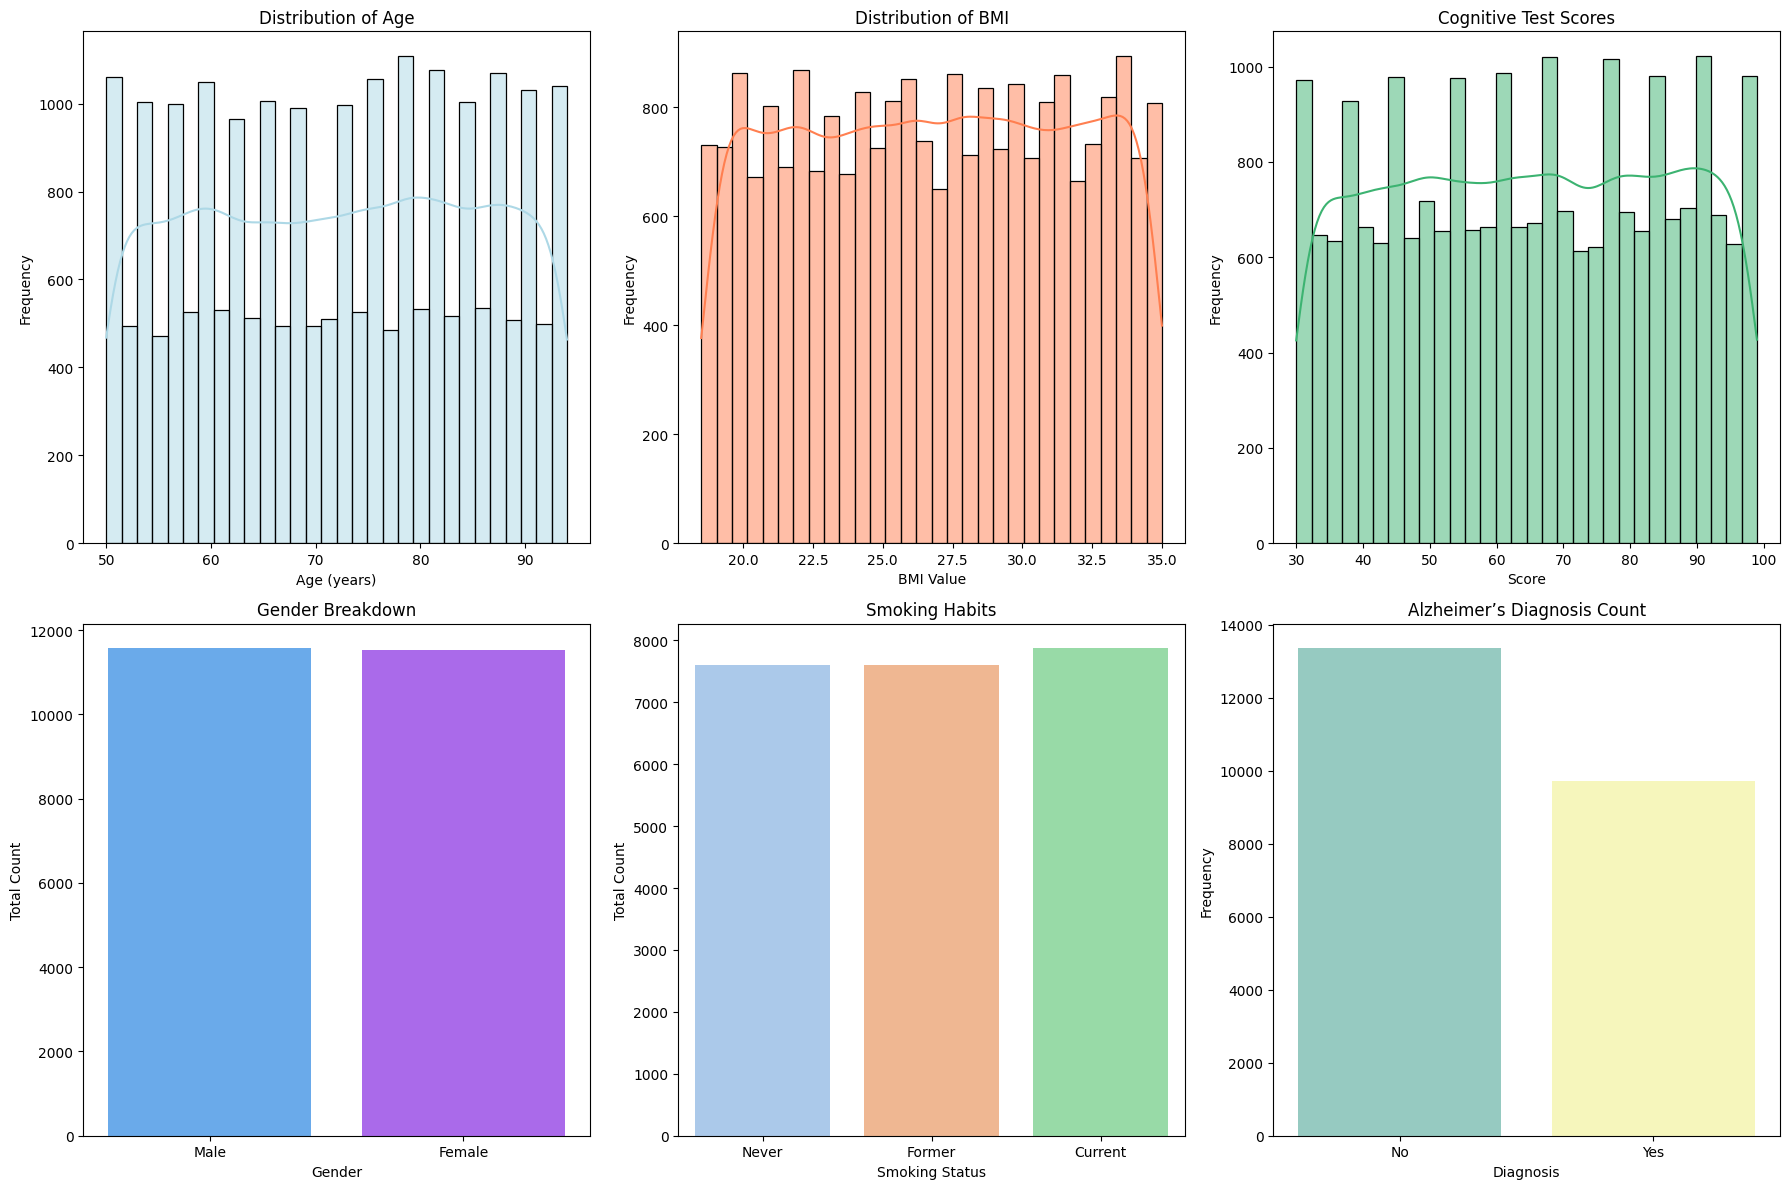

In [9]:
# Set the overall plot size
plt.figure(figsize=(18, 12))

# --- Plot 1: Age Histogram ---
plt.subplot(2, 3, 1)
sb.histplot(data=df_main, x='Age', bins=30, kde=True, color='lightblue')
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

# --- Plot 2: BMI Histogram ---
plt.subplot(2, 3, 2)
sb.histplot(df_main['BMI'], color='coral', bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI Value')
plt.ylabel('Frequency')

# --- Plot 3: Cognitive Score Histogram ---
plt.subplot(2, 3, 3)
sb.histplot(df_main['Cognitive Test Score'], bins=30, kde=True, color='mediumseagreen')
plt.title('Cognitive Test Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# --- Plot 4: Gender Count Plot ---
plt.subplot(2, 3, 4)
sb.countplot(x='Gender', data=df_main, palette='cool')
plt.title('Gender Breakdown')
plt.xlabel('Gender')
plt.ylabel('Total Count')

# --- Plot 5: Smoking Status Count Plot ---
plt.subplot(2, 3, 5)
sb.countplot(data=df_main, x='Smoking Status', palette='pastel')
plt.title('Smoking Habits')
plt.xlabel('Smoking Status')
plt.ylabel('Total Count')

# --- Plot 6: Alzheimer’s Diagnosis Count Plot ---
plt.subplot(2, 3, 6)
sb.countplot(x="Alzheimer’s Diagnosis", data=df_main, palette='Set3')
plt.title('Alzheimer’s Diagnosis Count')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')

# Adjust subplot spacing
plt.tight_layout()

# Optional print to confirm visualization step
print("Visualizations rendered successfully.")

# Render the plots
plt.show()


# Exploratory data analysis : Correlation Analysis

In [10]:
# Initialize a dictionary to store encoders for each categorical column
encoders_map = {}

# Apply Label Encoding to all categorical columns
categorical_features = df_main.select_dtypes(include=['object']).columns
for feature in categorical_features:
    encoder = LabelEncoder()
    df_main[feature] = encoder.fit_transform(df_main[feature])
    encoders_map[feature] = encoder  # Save encoder for possible inverse transform later

# Capture encoded column names for reference
encoded_columns = list(encoders_map.keys())

# Identify numerical columns to scale (excluding those already encoded)
all_numerics = df_main.select_dtypes(include=['int64', 'float64']).columns
columns_for_scaling = [col for col in all_numerics if col not in encoded_columns]

# Initialize and apply standard scaler
scaling_tool = StandardScaler()
df_main[columns_for_scaling] = scaling_tool.fit_transform(df_main[columns_for_scaling])

# Log confirmation
print("Encoding complete for categorical features.")
print("Scaling applied to numerical columns (excluding encoded categorical features).")

# Preview scaled data
print("\nSample of Scaled Numerical Features:")
print(df_main[columns_for_scaling].head())


Encoding complete for categorical features.
Scaling applied to numerical columns (excluding encoded categorical features).

Sample of Scaled Numerical Features:
        Age  Education Level       BMI  Cognitive Test Score
0  1.374332        -1.471511  1.297819              1.254109
1 -0.011185        -0.427459  0.648212              0.012135
2  1.066440         1.660646 -0.818642             -1.080801
3 -1.473675         1.312628  0.920628              0.806998
4 -1.088809        -1.123494  0.669167             -0.782728


Label encoding applied to all categorical variables.

Generating correlation matrix using Pearson method...


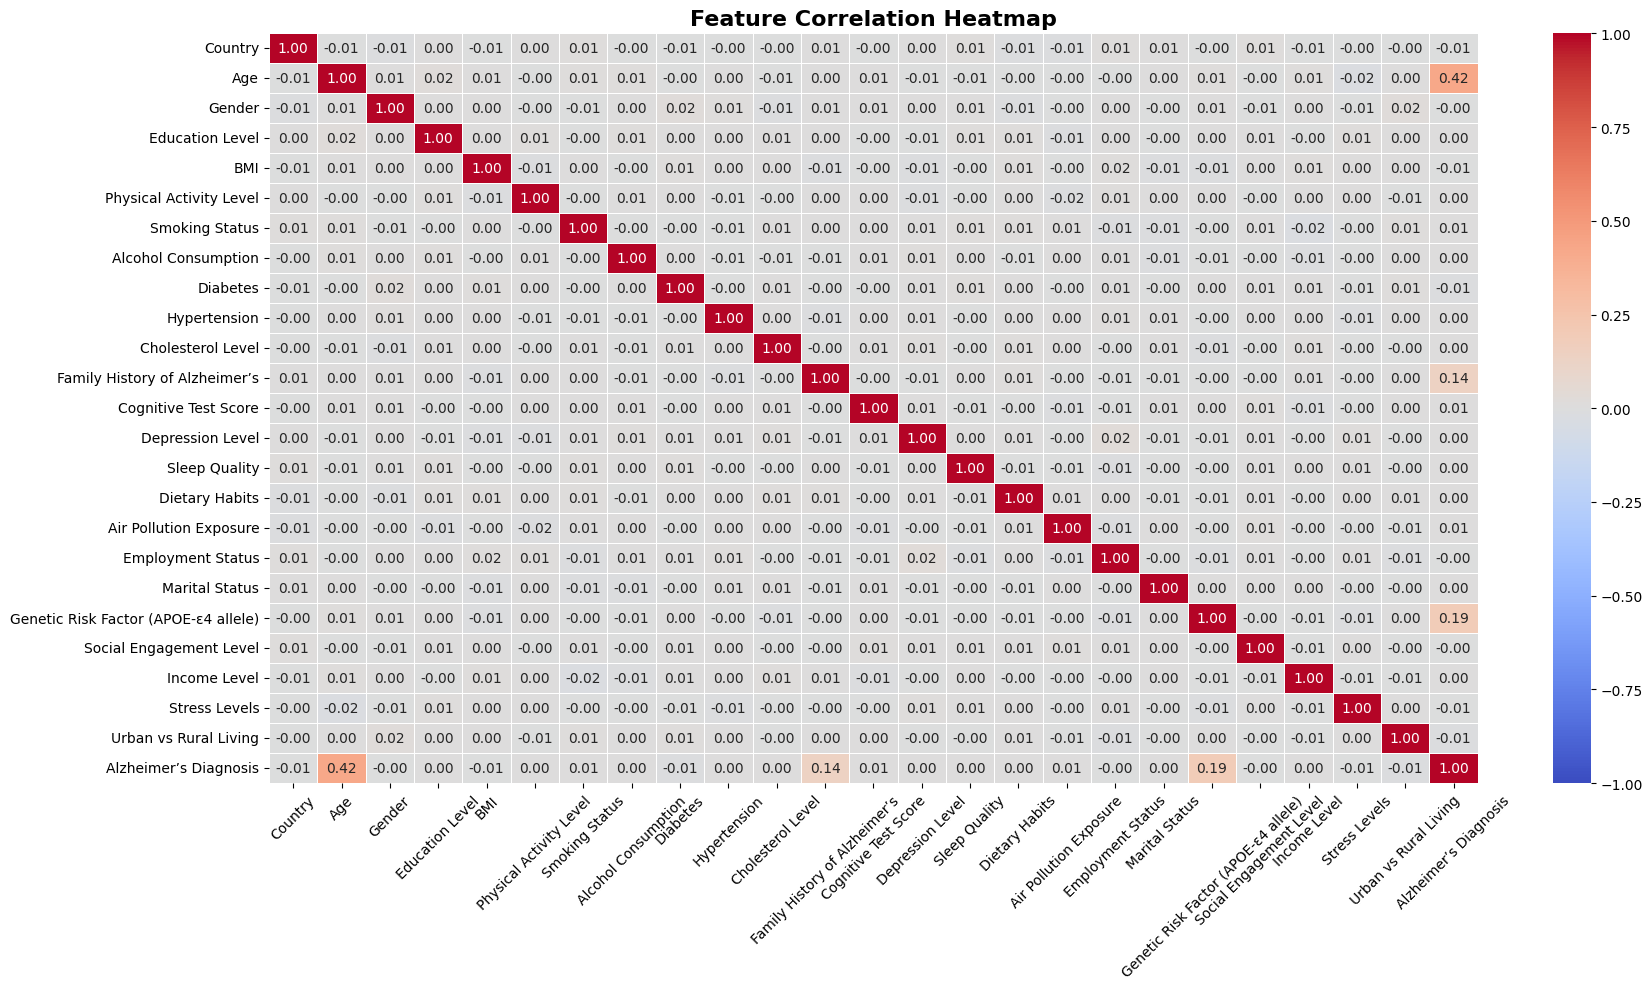

In [11]:
# -- Encode Categorical Columns ---
enc_map = {}
categorical_vars = df_main.select_dtypes(include=['object']).columns

for feature in categorical_vars:
    le = LabelEncoder()
    df_main[feature] = le.fit_transform(df_main[feature])
    enc_map[feature] = le  # Saving encoder for reference

print("Label encoding applied to all categorical variables.")

# --- Compute Correlation Matrix ---
print("\nGenerating correlation matrix using Pearson method...")
corr_mat = df_main.corr(method='pearson')

# --- Plot the Correlation Heatmap ---
plt.figure(figsize=(18, 10))
sb.heatmap(corr_mat, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


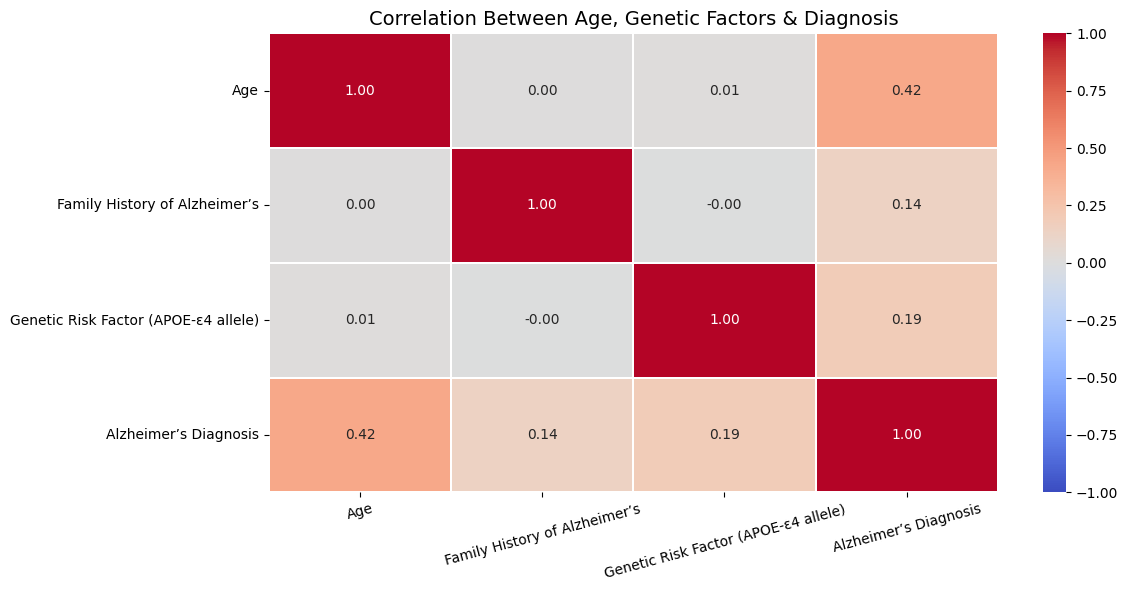

In [12]:
2# Select relevant features for correlation analysis
features_to_plot = ['Age', 'Family History of Alzheimer’s',
                    'Genetic Risk Factor (APOE-ε4 allele)',
                    'Alzheimer’s Diagnosis']

# Compute correlation matrix for selected features
focused_corr = df_main[features_to_plot].corr(method='pearson')

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sb.heatmap(focused_corr, annot=True, cmap='coolwarm', fmt=".2f", linecolor='white', linewidths=0.3, vmin=-1, vmax=1)
plt.title("Correlation Between Age, Genetic Factors & Diagnosis", fontsize=14)
plt.xticks(rotation=15)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Comparison of Machine Learning Model Performance

In [13]:
# Select input features and target variable
features = df_main[['Age', 'Family History of Alzheimer’s', 'Genetic Risk Factor (APOE-ε4 allele)']]
target = df_main['Alzheimer’s Diagnosis']

# Split dataset into training and testing sets (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Dictionary of models to compare
ml_models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost Classifier": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Define evaluation function for model performance
def assess_model_performance(estimator, X_tr, X_te, y_tr, y_te):
    estimator.fit(X_tr, y_tr)
    predictions = estimator.predict(X_te)

    acc = accuracy_score(y_te, predictions)
    prec = precision_score(y_te, predictions, average='weighted', zero_division=0)
    rec = recall_score(y_te, predictions, average='weighted', zero_division=0)
    f1 = f1_score(y_te, predictions, average='weighted', zero_division=0)

    # Optional: print to debug individual scores
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")

    return acc, prec, rec, f1


In [14]:
# List to store evaluation outcomes
model_performance_log = []

# Evaluate each model and collect metrics
for model_name, clf in ml_models.items():
    acc, prec, rec, f1_score_val = assess_model_performance(clf, X_train, X_test, y_train, y_test)

    model_performance_log.append({
        "Model Name": model_name,
        "Accuracy (%)": round(acc * 100, 2),
        "Precision (%)": round(prec * 100, 2),
        "Recall (%)": round(rec * 100, 2),
        "F1 Score (%)": round(f1_score_val * 100, 2)
    })

# Convert results into a readable DataFrame
performance_df = pd.DataFrame(model_performance_log)

# Display the performance table
performance_df


Accuracy: 0.7033, Precision: 0.7010, Recall: 0.7033, F1 Score: 0.6998
Accuracy: 0.6806, Precision: 0.6821, Recall: 0.6806, F1 Score: 0.6812
Accuracy: 0.7263, Precision: 0.7299, Recall: 0.7263, F1 Score: 0.7273
Accuracy: 0.7272, Precision: 0.7317, Recall: 0.7272, F1 Score: 0.7283


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:47:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7282, Precision: 0.7325, Recall: 0.7282, F1 Score: 0.7293


,Model Name,Accuracy (%),Precision (%),Recall (%),F1 Score (%)
0,Logistic Regression,70.33,70.10,70.33,69.98
1,K-Nearest Neighbors,68.06,68.21,68.06,68.12
2,Decision Tree Classifier,72.63,72.99,72.63,72.73
3,Random Forest Classifier,72.72,73.17,72.72,72.83
4,XGBoost Classifier,72.82,73.25,72.82,72.93



# Conclusion


Best Performing Model (Based on Accuracy):
Model Name       XGBoost Classifier
Accuracy (%)                  72.82
Precision (%)                 73.25
Recall (%)                    72.82
F1 Score (%)                  72.93
Name: 4, dtype: object


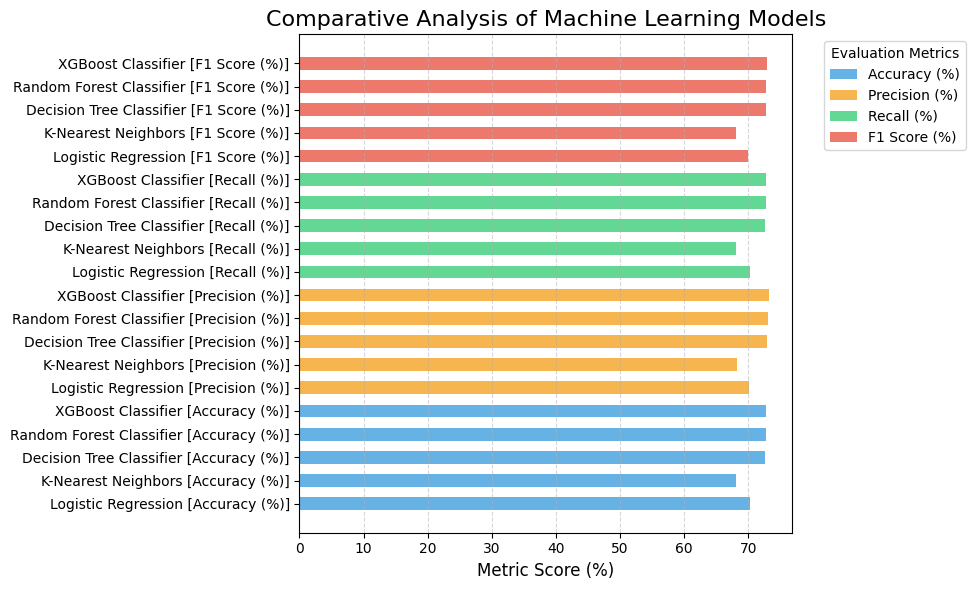


Optimal Model Selected: XGBoost Classifier  ---> Accuracy: 72.82%


In [15]:
# Identify the best-performing model based on highest accuracy
top_model_row = performance_df.loc[performance_df['Accuracy (%)'].idxmax()]
print("\nBest Performing Model (Based on Accuracy):")
print(top_model_row)

# Define evaluation metrics and visualization parameters
score_labels = ["Accuracy (%)", "Precision (%)", "Recall (%)", "F1 Score (%)"]
bar_colors = ["#3498db", "#f39c12", "#2ecc71", "#e74c3c"]

# Initialize horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Create grouped horizontal bars for each metric across all models
for idx, metric in enumerate(score_labels):
    ax.barh(
        performance_df["Model Name"] + f" [{metric}]",
        performance_df[metric],
        color=bar_colors[idx],
        alpha=0.75,
        height=0.55,
        label=metric
    )

# Customize the plot
ax.set_xlabel("Metric Score (%)", fontsize=12)
ax.set_title("Comparative Analysis of Machine Learning Models", fontsize=16)
ax.legend(title="Evaluation Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Summary of best model
print(f"\nOptimal Model Selected: {top_model_row['Model Name']}  ---> Accuracy: {top_model_row['Accuracy (%)']}%")
